# Short Course: Machine Learning for Exploration Geophysics

Hamburg, 10. - 12. March 2020

#### Computer Class 1.3: XGBoost

Table of Content:
- [Packages](#Packages)
- [Import and preprocess the dataset](#Import-and-preprocess-the-dataset)
- [XGBoost](#XGBoost)
- [AdaBoost](#AdaBoost)

## Packages

Let's first import all the packages: 
- [numpy](https://www.numpy.org/) is the fundamental package for scientific computing with Python.
- [pandas](https://pandas.pydata.org/) is a software library for data manipulation and analysis.
- [matplotlib](https://matplotlib.org/) is a comprehensive library for creating static, animated, and interactive visualizations in Python.
- [seaborn](https://seaborn.pydata.org/) is a statistical data visualization library based on matplotlib.
- [scikit-learn](https://scikit-learn.org/stable/) is a simple and efficient tools for predictive data analysis.

In [3]:
#!pip install pandas
#!pip install -U scikit-learn

#!python -m pip install -U pip
#!python -m pip install -U matplotlib

#!pip install pandas

#!pip install seaborn

#!pip install xgboost

In [15]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import xgboost

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import KFold
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import AdaBoostRegressor

import warnings
warnings.filterwarnings('ignore')

print('Pandas:  ' + pd.__version__)
print('Numpy:   ' + np.__version__)
print('Sklearn: ' + sklearn.__version__)

Pandas:  0.24.2
Numpy:   1.17.4
Sklearn: 0.22.2.post1


## Import and preprocess the dataset

In [11]:
df = pd.read_csv('data/berlin_flat_price.csv')
df['Price'] = df['Price']/1000;  # in 1000s euro

X = df[['Size']].values
y = df['Price'].values    

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

#X_scaled.mean()
#X_scaled.std()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=False)

## XGBoost


In [30]:
from xgboost import XGBRegressor

xgb = XGBRegressor(max_depth=4, random_state = 12)
xgb.fit(X_train,y_train)
print('MSE %.2f' %mean_squared_error(y_test,xgb.predict(X_test),squared=False))

print(xgb)


MSE 99.82
XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=12, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)


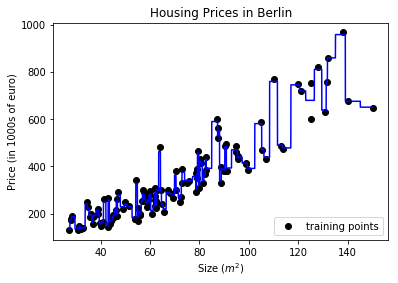

In [31]:
X_plot = np.arange(min(X),max(X),0.01)
X_plot = np.matrix(X_plot).T

fig = plt.figure()
plt.scatter(X_train, y_train, color='black', marker='o', label="training points")
plt.plot(X_plot, xgb.predict(X_plot), color='blue')
plt.xlabel('Size ($m^2$)')
plt.ylabel('Price (in 1000s of euro)')
plt.title('Housing Prices in Berlin')
plt.legend(loc='lower right')
plt.show()
fig.tight_layout()

## Adaboost

In [22]:
ada = AdaBoostRegressor(n_estimators=50, learning_rate=1)

ada.fit(X_train, y_train)

print('MSE %.2f' %mean_squared_error(y_test,ada.predict(X_test),squared=False))

MSE 97.38


In [25]:
reg = make_pipeline(StandardScaler(),PolynomialFeatures(degree=3),Ridge())

reg_ada = AdaBoostRegressor(base_estimator=reg, n_estimators=50, learning_rate=1)

reg_ada.fit(X_train, y_train)

print('MSE %.2f' %mean_squared_error(y_test,reg_ada.predict(X_test),squared=False))

MSE 101.33


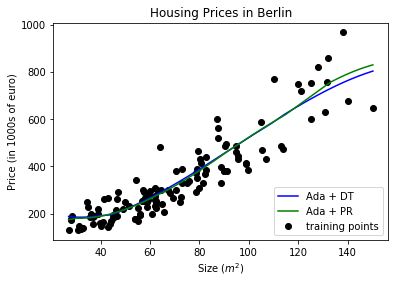

In [28]:
X_plot = np.arange(min(X),max(X),0.01)
X_plot = np.matrix(X_plot).T

fig = plt.figure()
plt.scatter(X_train, y_train, color='black', marker='o', label="training points")
plt.plot(X_plot, ada.predict(X_plot), color='blue', label="Ada + DT")
plt.plot(X_plot, reg_ada.predict(X_plot), color='green', label="Ada + PR")
plt.xlabel('Size ($m^2$)')
plt.ylabel('Price (in 1000s of euro)')
plt.title('Housing Prices in Berlin')
plt.legend(loc='lower right')
plt.show()
fig.tight_layout()

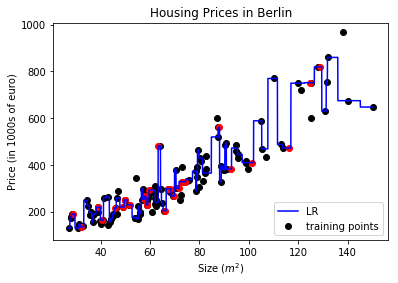

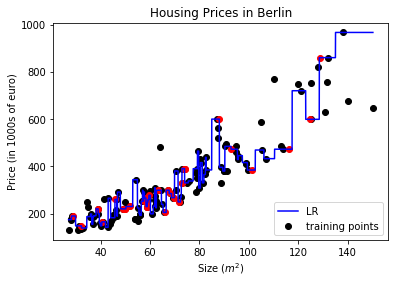

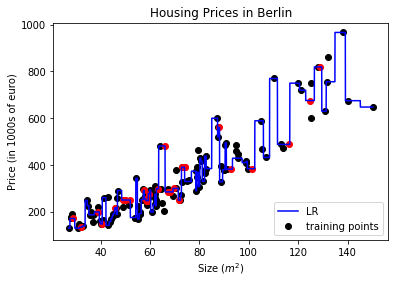

In [56]:
#reg = LinearRegression()
#reg = make_pipeline(StandardScaler(),PolynomialFeatures(degree=2),LinearRegression())

from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor

kfold = KFold(n_splits=3, shuffle=True)

i = 11
for ind_train, ind_test in kfold.split(X_train):
    i = i+1
    X_train_new = X_train[ind_train]
    y_train_new = y_train[ind_train]
    reg = DecisionTreeRegressor()
    reg.fit(X_train_new,y_train_new)

    X_plot = np.arange(min(X),max(X),0.01)
    X_plot = np.matrix(X_plot).T

    fig = plt.figure()
    plt.scatter(X_train, y_train, color='black', marker='o', label="training points")
    plt.plot(X_plot, reg.predict(X_plot), color='blue', label="LR")
    plt.scatter(X_test, reg.predict(X_test), color='red', marker='o')
    plt.xlabel('Size ($m^2$)')
    plt.ylabel('Price (in 1000s of euro)')
    plt.title('Housing Prices in Berlin')
    plt.legend(loc='lower right')
    plt.show()
    fig.tight_layout()
    filename = "fig" + str(i) + ".png"
    fig.savefig(filename, dpi=300)

In [53]:
filename

['fig11.png']